<a href="https://colab.research.google.com/github/erigitola/-Random-User--Generator--using--API/blob/main/Healthcare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

data = {
    "visit_date": ["2026-01-01","2026-01-01","2026-01-02","2026-01-02","2026-01-03",
                   "2026-01-03","2026-01-04","2026-01-04","2026-01-05","2026-01-05"],

    "patient_id": ["P001","P002","P003","P004","P005",
                   "P006","P007","P008","P009","P010"],

    "department": ["General","Emergency","General","Cardiology","Emergency",
                   "General","Cardiology","Emergency","General","Cardiology"],

    "treatment_cost": [12000,45000,18000,65000,52000,15000,70000,48000,22000,60000],

    "length_of_stay_days": [1,3,2,5,4,1,6,3,2,5],

    "outcome": ["Recovered","Admitted","Recovered","Admitted","Admitted",
                "Recovered","Admitted","Admitted","Recovered","Admitted"]
}

df = pd.DataFrame(data)
df


,visit_date,patient_id,department,treatment_cost,length_of_stay_days,outcome
0,2026-01-01,P001,General,12000,1,Recovered
1,2026-01-01,P002,Emergency,45000,3,Admitted
2,2026-01-02,P003,General,18000,2,Recovered
3,2026-01-02,P004,Cardiology,65000,5,Admitted
4,2026-01-03,P005,Emergency,52000,4,Admitted
5,2026-01-03,P006,General,15000,1,Recovered
6,2026-01-04,P007,Cardiology,70000,6,Admitted
7,2026-01-04,P008,Emergency,48000,3,Admitted
8,2026-01-05,P009,General,22000,2,Recovered
9,2026-01-05,P010,Cardiology,60000,5,Admitted


In [4]:
df.head()

,visit_date,patient_id,department,treatment_cost,length_of_stay_days,outcome
0,2026-01-01,P001,General,12000,1,Recovered
1,2026-01-01,P002,Emergency,45000,3,Admitted
2,2026-01-02,P003,General,18000,2,Recovered
3,2026-01-02,P004,Cardiology,65000,5,Admitted
4,2026-01-03,P005,Emergency,52000,4,Admitted


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   visit_date           10 non-null     object
 1   patient_id           10 non-null     object
 2   department           10 non-null     object
 3   treatment_cost       10 non-null     int64 
 4   length_of_stay_days  10 non-null     int64 
 5   outcome              10 non-null     object
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


In [8]:
df.shape

(10, 6)

In [13]:
# Average cost and patient count by department
dept_summary = df.groupby("department").agg(
    total_patients=("patient_id", "count"),
    total_cost=("treatment_cost", "sum"),
    avg_cost=("treatment_cost", "mean"),
    avg_stay=("length_of_stay_days", "mean")
).reset_index()

dept_summary


,department,total_patients,total_cost,avg_cost,avg_stay
0,Cardiology,3,195000,65000.000000,5.333333
1,Emergency,3,145000,48333.333333,3.333333
2,General,4,67000,16750.000000,1.500000


In [14]:
# Daily hospital cost
daily_cost = df.groupby("visit_date")["treatment_cost"].sum().reset_index()
daily_cost


,visit_date,treatment_cost
0,2026-01-01,57000
1,2026-01-02,83000
2,2026-01-03,67000
3,2026-01-04,118000
4,2026-01-05,82000


In [15]:
# Patient Cost Risk Classification
def cost_level(cost):
    if cost >= 50000:
        return "High Cost"
    elif cost >= 20000:
        return "Medium Cost"
    else:
        return "Low Cost"

df["cost_level"] = df["treatment_cost"].apply(cost_level)
df


,visit_date,patient_id,department,treatment_cost,length_of_stay_days,outcome,cost_level
0,2026-01-01,P001,General,12000,1,Recovered,Low Cost
1,2026-01-01,P002,Emergency,45000,3,Admitted,Medium Cost
2,2026-01-02,P003,General,18000,2,Recovered,Low Cost
3,2026-01-02,P004,Cardiology,65000,5,Admitted,High Cost
4,2026-01-03,P005,Emergency,52000,4,Admitted,High Cost
5,2026-01-03,P006,General,15000,1,Recovered,Low Cost
6,2026-01-04,P007,Cardiology,70000,6,Admitted,High Cost
7,2026-01-04,P008,Emergency,48000,3,Admitted,Medium Cost
8,2026-01-05,P009,General,22000,2,Recovered,Medium Cost
9,2026-01-05,P010,Cardiology,60000,5,Admitted,High Cost


In [17]:
# Flag High-Cost patients
for i in range(len(df)):
    if df.loc[i, "cost_level"] == "High Cost":
        print("High Cost Patient:",
              df.loc[i, "patient_id"],
              "| Dept:", df.loc[i, "department"],
              "| Cost:", df.loc[i, "treatment_cost"])


High Cost Patient: P004 | Dept: Cardiology | Cost: 65000
High Cost Patient: P005 | Dept: Emergency | Cost: 52000
High Cost Patient: P007 | Dept: Cardiology | Cost: 70000
High Cost Patient: P010 | Dept: Cardiology | Cost: 60000


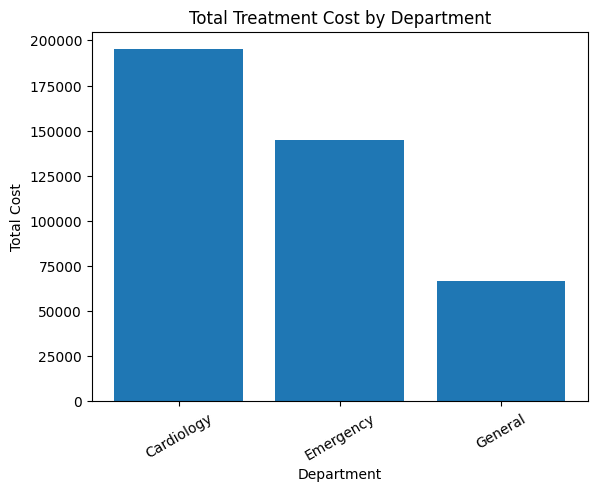

In [18]:


plt.figure()
plt.bar(dept_summary["department"], dept_summary["total_cost"])
plt.title("Total Treatment Cost by Department")
plt.xlabel("Department")
plt.ylabel("Total Cost")
plt.xticks(rotation=30)
plt.show()


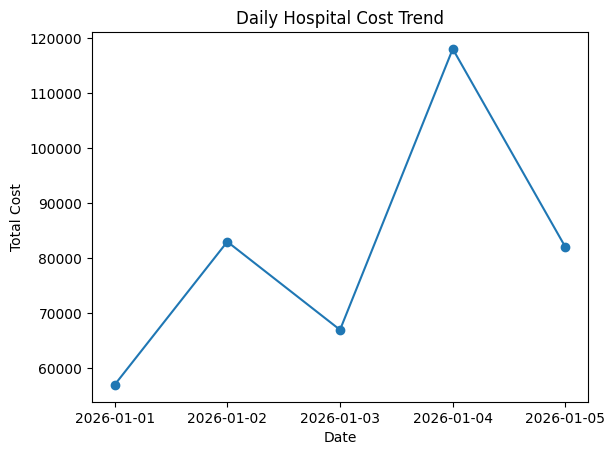

In [19]:
plt.figure()
plt.plot(daily_cost["visit_date"], daily_cost["treatment_cost"], marker="o")
plt.title("Daily Hospital Cost Trend")
plt.xlabel("Date")
plt.ylabel("Total Cost")
plt.show()


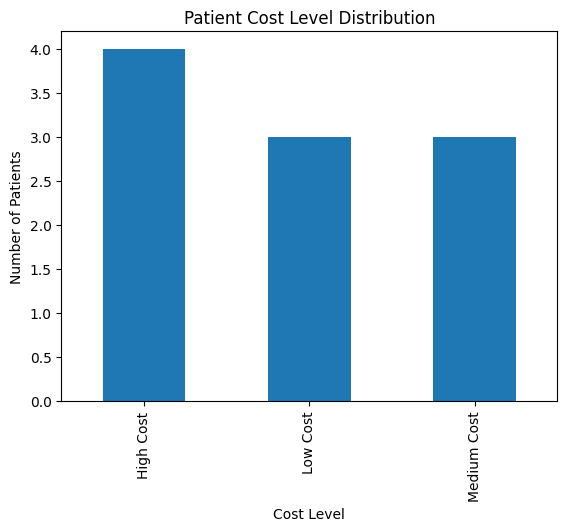

In [20]:
df["cost_level"].value_counts().plot(kind="bar")
plt.title("Patient Cost Level Distribution")
plt.xlabel("Cost Level")
plt.ylabel("Number of Patients")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["length_of_stay_days"]]
y = df["treatment_cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions


array([25893.71980676, 37971.01449275])